In [266]:
import os
import sys
import json
import torch
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from torchsummary import summary
import matplotlib.pyplot as plt
from model_dev.dataloader import data_provider
from model_dev.stock_picker import StockPicker
from visualize_single import Visualize, craete_heatmap
from scatter_plot import Scatter
from model_dev.utills import read_default_args, load_model, get_stock_meta, get_stock_heatmap_matrix

# import mse loss from torch
from torch.nn import MSELoss
# import lregularized mse loss from torch


%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/Users/shiva/Desktop/maestro/model_dev/')
from expirement import ExpMain


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DLinear

In [50]:
default_args = read_default_args()

In [51]:
config_file = '../../configs/config_shiva.json'
config = json.load(open(config_file))
data_dir = config['data_dir']
raw_dir = "{}/{}".format(data_dir, config['raw_data_dir'])
csv_dir = "{}/{}".format(data_dir, config['raw_data_csv'])
ltsf = "{}/ltsf".format(data_dir)

In [142]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '11_22.csv,01_23.csv,03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 1,
   'learning_rate': 0.025,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 297,
   'patience': 5,
   'target': 0,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value

args = argparse.Namespace(**default_args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)

weights = os.listdir("{}/{}".format(args.checkpoints, setting))
sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)
sorted_weights

['checkpoint_3.8699.pth',
 'checkpoint_1.4859.pth',
 'checkpoint_1.3639.pth',
 'checkpoint_1.1595.pth',
 'checkpoint_1.0544.pth',
 'checkpoint_1.0247.pth']

Load model from /Users/shiva/Desktop/data_maestro//checkpoints/mod_nlinear_attention_sl120_pl30_ds_11_22_tg_0_ch_297/checkpoint_1.0247.pth
Original data shape: (46500, 298)
Data shape after inter-day:  27900
val 2761


  0%|          | 0/84 [00:00<?, ?it/s]

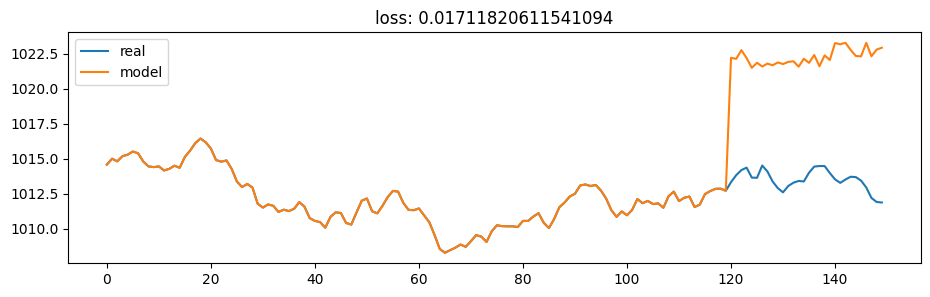

  1%|          | 1/84 [00:00<00:11,  7.28it/s]

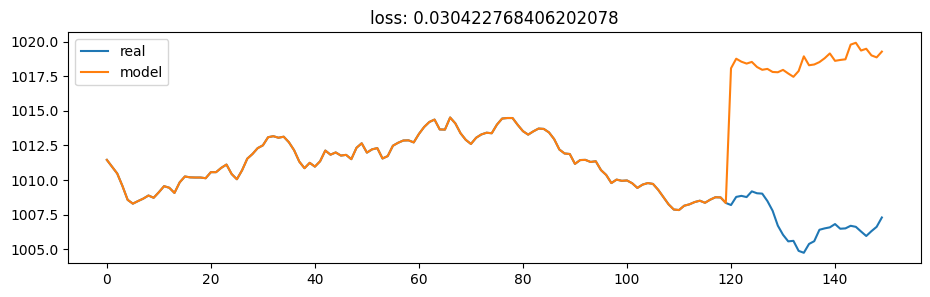

  2%|▏         | 2/84 [00:00<00:11,  7.37it/s]

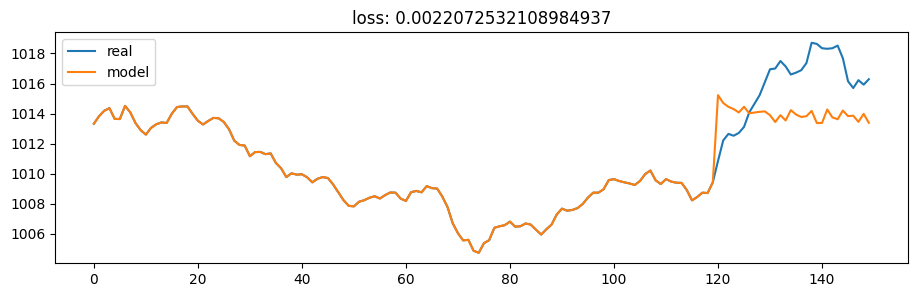

  4%|▎         | 3/84 [00:00<00:10,  7.46it/s]

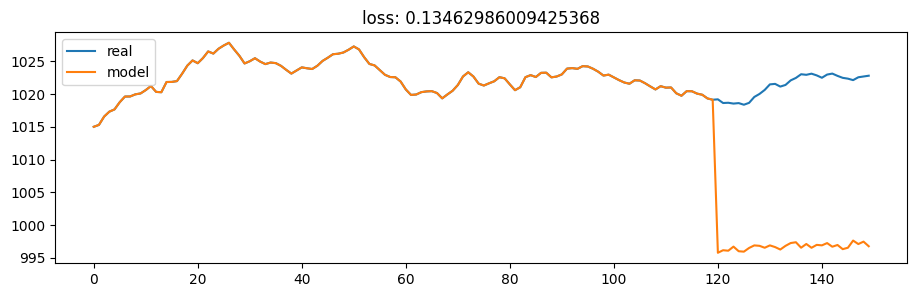

  5%|▍         | 4/84 [00:00<00:11,  7.23it/s]

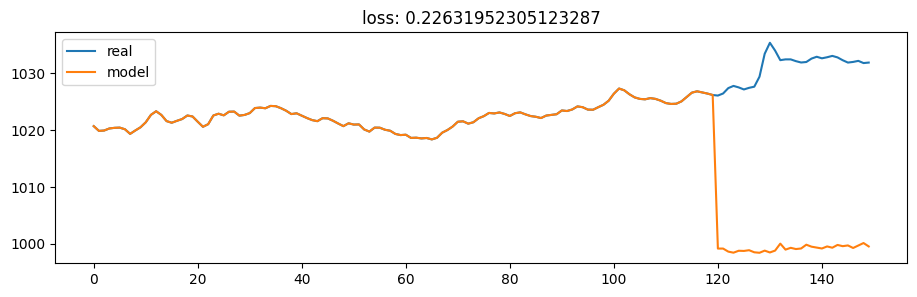

  6%|▌         | 5/84 [00:00<00:10,  7.57it/s]

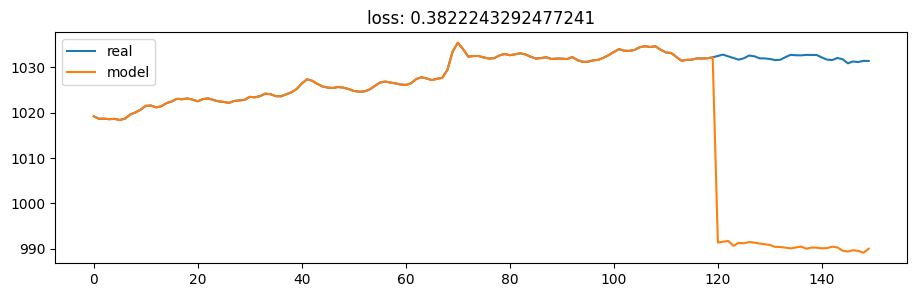

  7%|▋         | 6/84 [00:00<00:10,  7.66it/s]

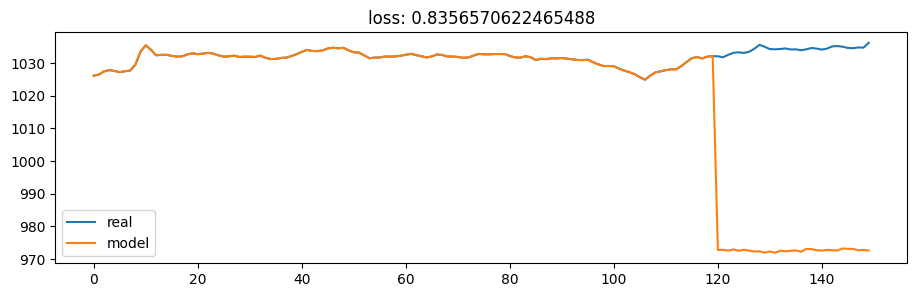

  8%|▊         | 7/84 [00:00<00:10,  7.53it/s]

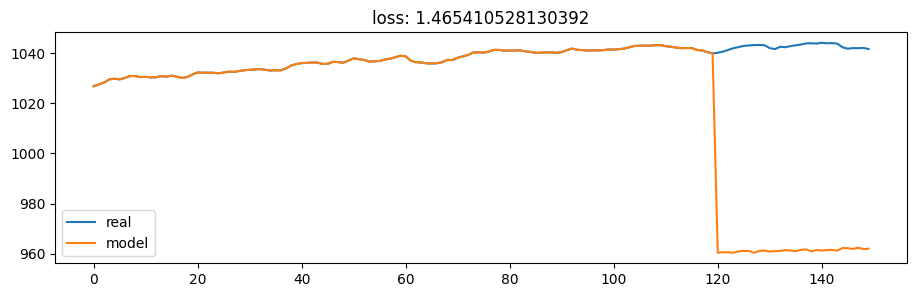

 10%|▉         | 8/84 [00:01<00:09,  7.61it/s]

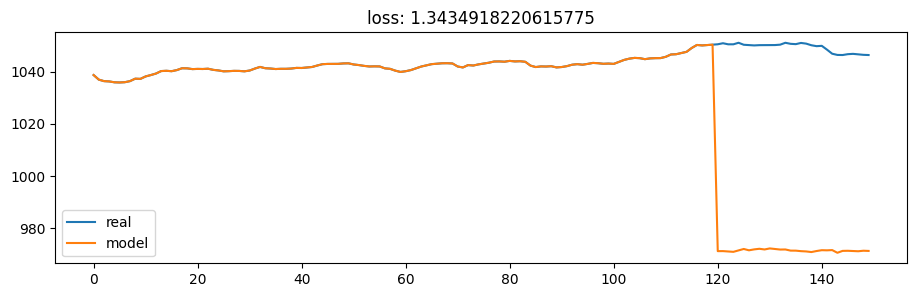

 11%|█         | 9/84 [00:01<00:09,  7.82it/s]

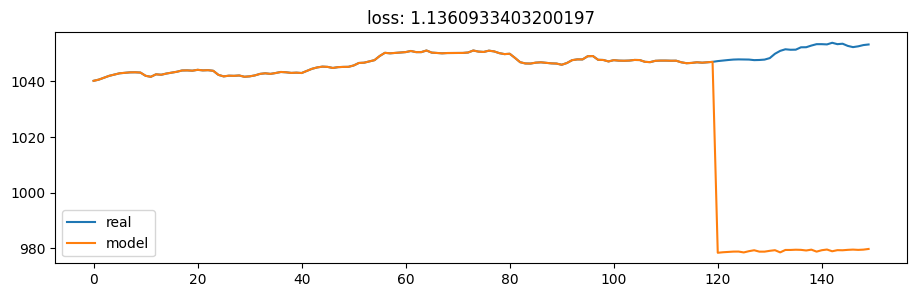

 12%|█▏        | 10/84 [00:01<00:09,  7.74it/s]

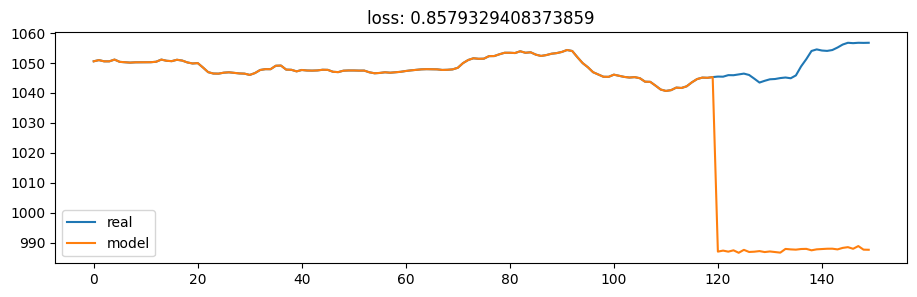

 13%|█▎        | 11/84 [00:01<00:09,  7.59it/s]

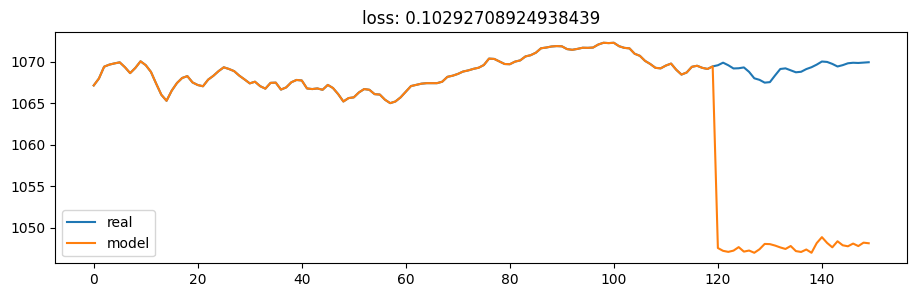

 14%|█▍        | 12/84 [00:01<00:09,  7.61it/s]

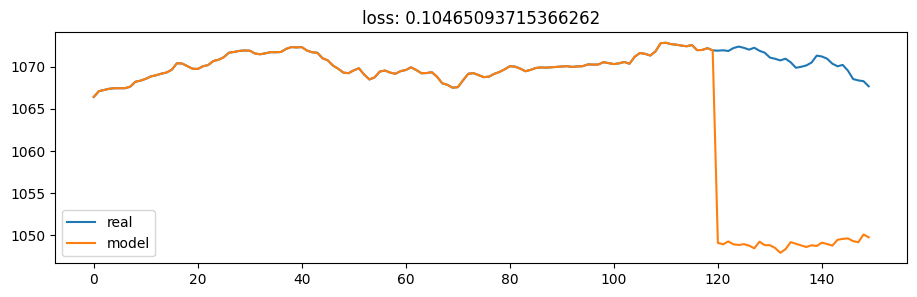

 15%|█▌        | 13/84 [00:01<00:09,  7.11it/s]

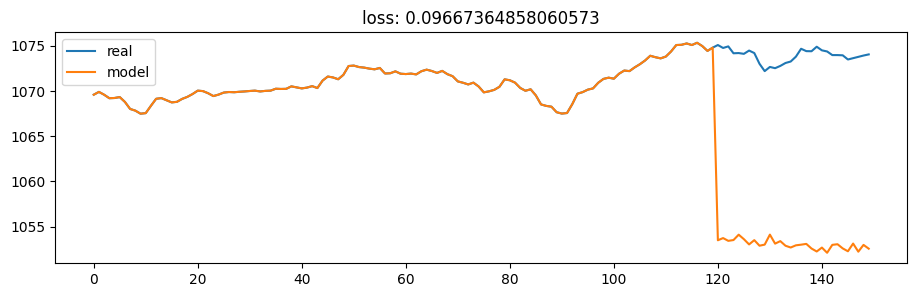

 17%|█▋        | 14/84 [00:02<00:15,  4.48it/s]

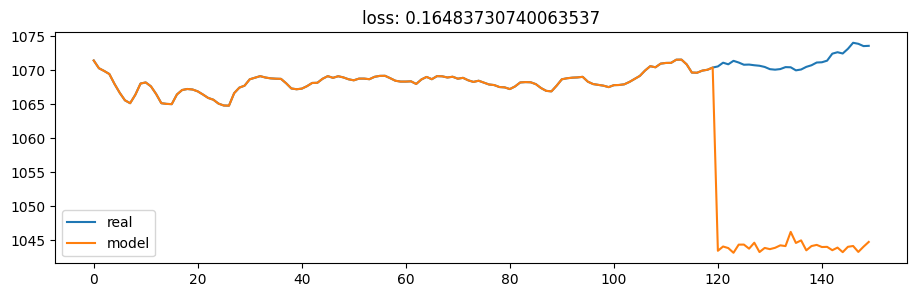

 18%|█▊        | 15/84 [00:02<00:14,  4.93it/s]

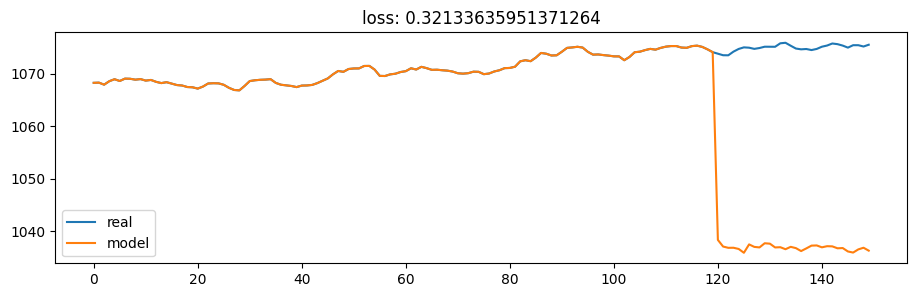

 19%|█▉        | 16/84 [00:02<00:12,  5.40it/s]

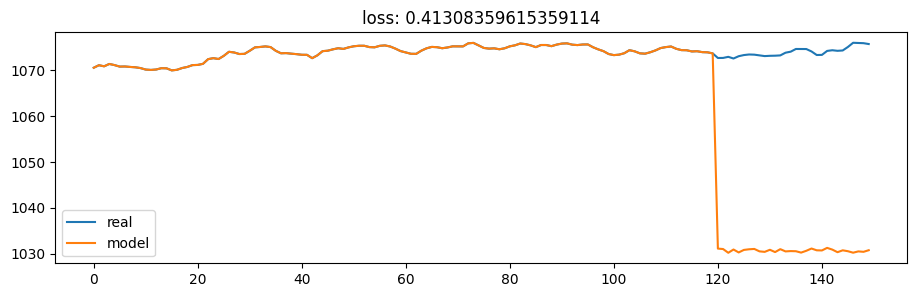

 20%|██        | 17/84 [00:02<00:11,  5.78it/s]

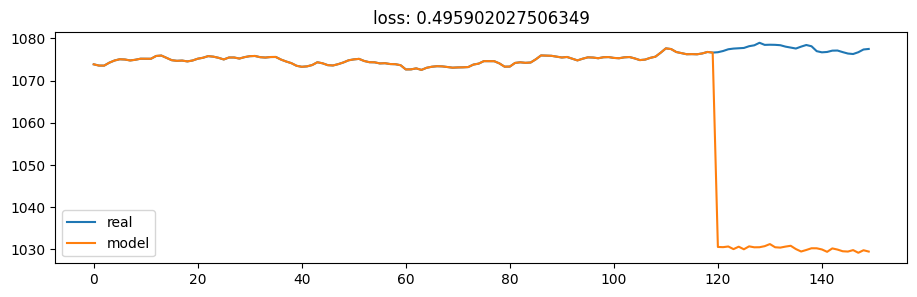

 21%|██▏       | 18/84 [00:02<00:10,  6.09it/s]

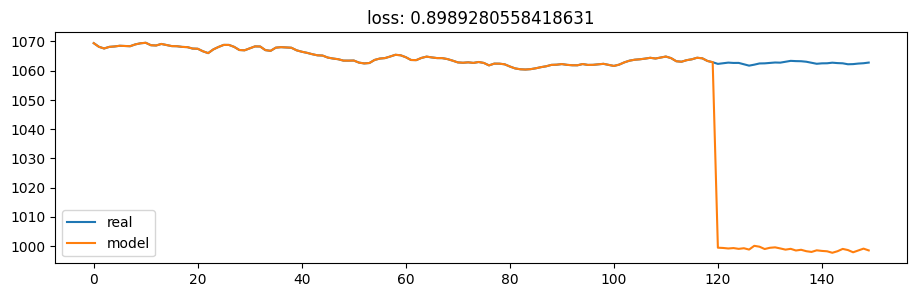

 23%|██▎       | 19/84 [00:02<00:10,  6.21it/s]

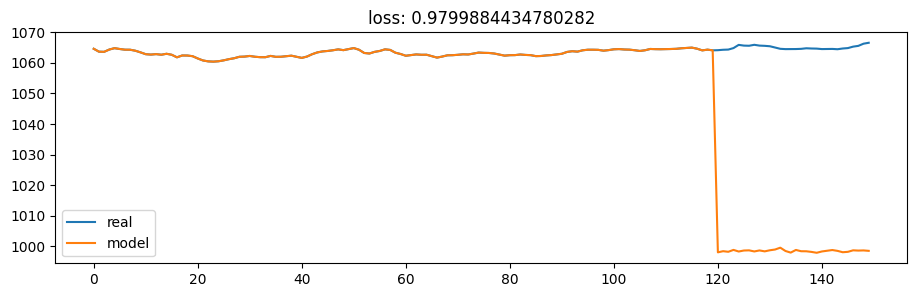

 24%|██▍       | 20/84 [00:03<00:10,  6.14it/s]

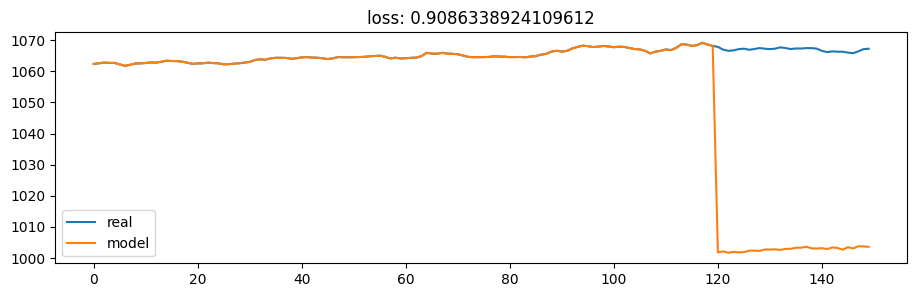

 25%|██▌       | 21/84 [00:03<00:11,  5.62it/s]

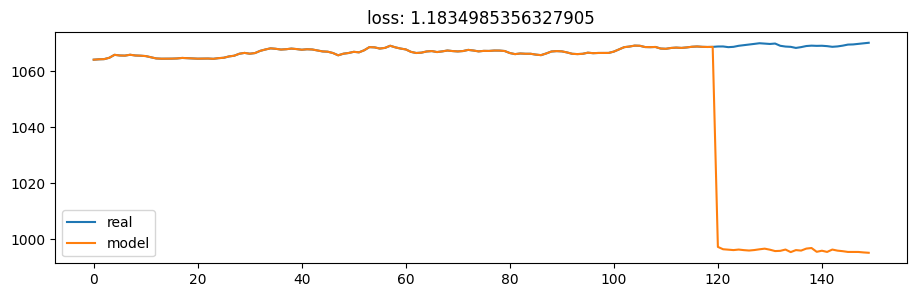

 26%|██▌       | 22/84 [00:03<00:10,  5.82it/s]

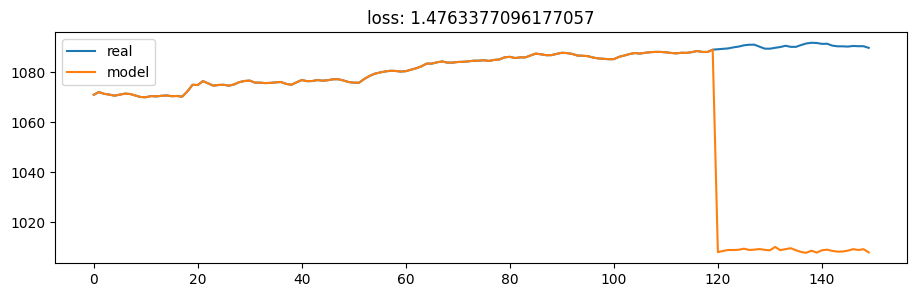

 27%|██▋       | 23/84 [00:03<00:09,  6.22it/s]

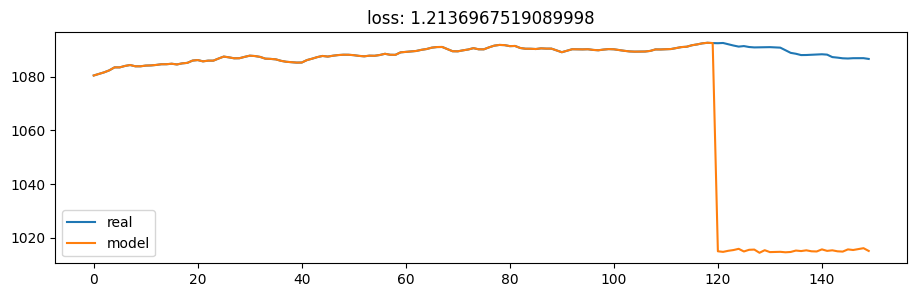

 29%|██▊       | 24/84 [00:03<00:09,  6.49it/s]

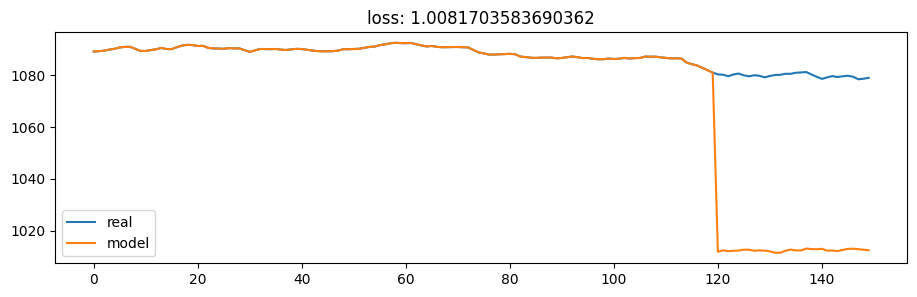

 30%|██▉       | 25/84 [00:03<00:08,  6.76it/s]

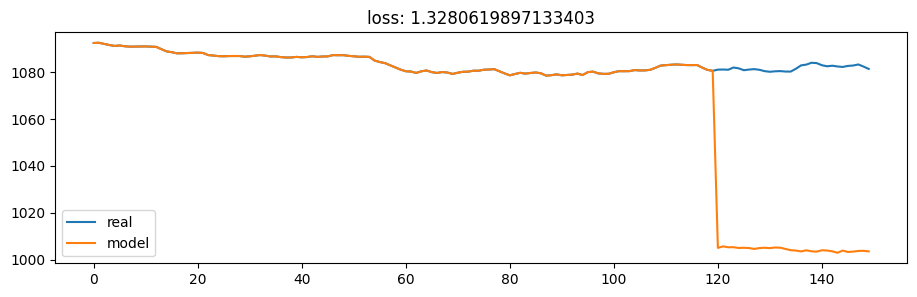

 31%|███       | 26/84 [00:03<00:08,  6.90it/s]

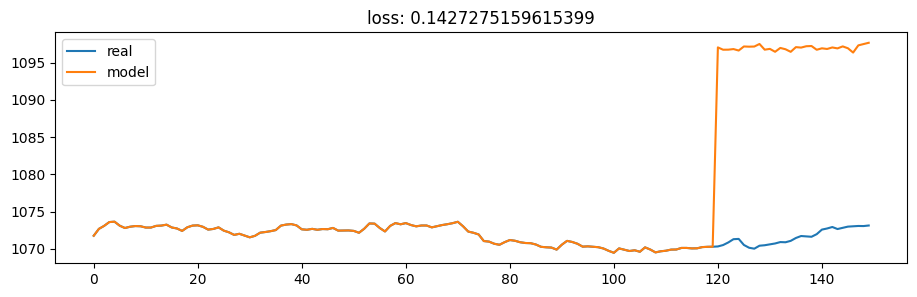

 32%|███▏      | 27/84 [00:04<00:08,  6.98it/s]

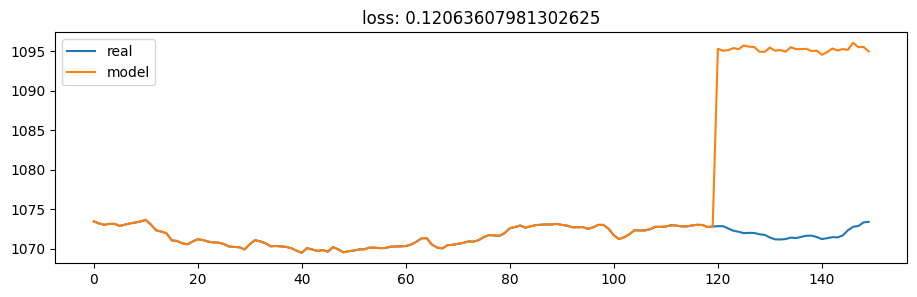

 33%|███▎      | 28/84 [00:04<00:08,  6.45it/s]

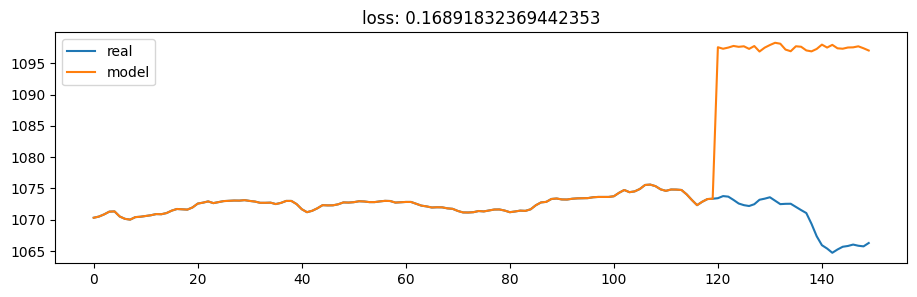

 35%|███▍      | 29/84 [00:04<00:08,  6.49it/s]

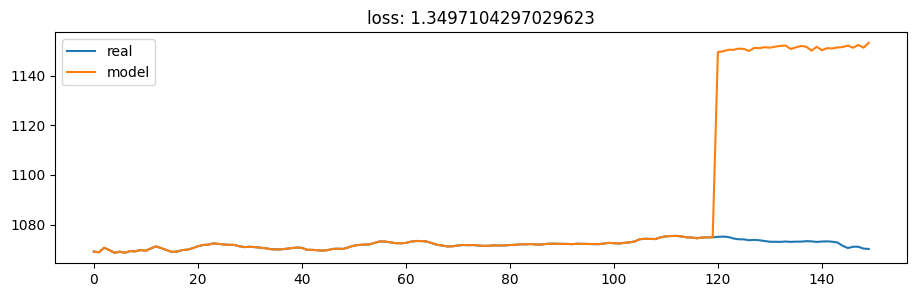

 36%|███▌      | 30/84 [00:04<00:08,  6.71it/s]

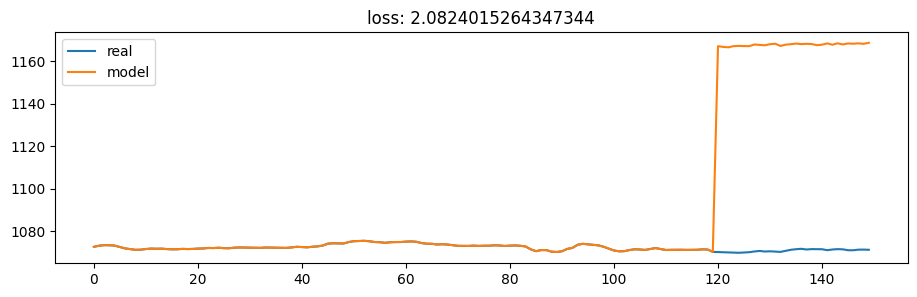

 37%|███▋      | 31/84 [00:04<00:07,  6.76it/s]

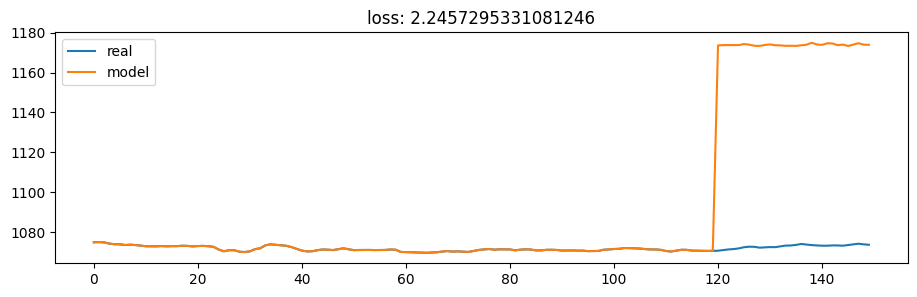

 38%|███▊      | 32/84 [00:04<00:07,  6.80it/s]

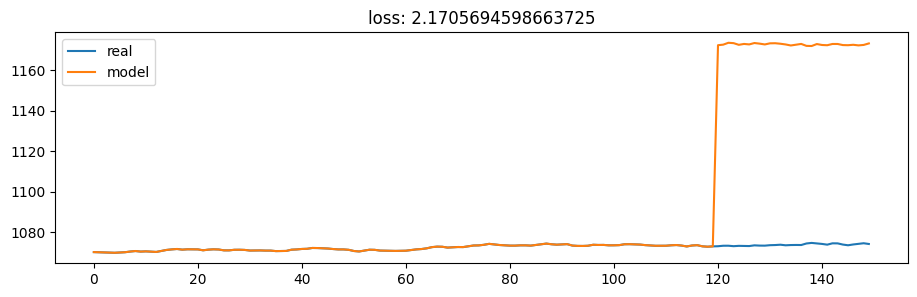

 39%|███▉      | 33/84 [00:05<00:07,  6.90it/s]

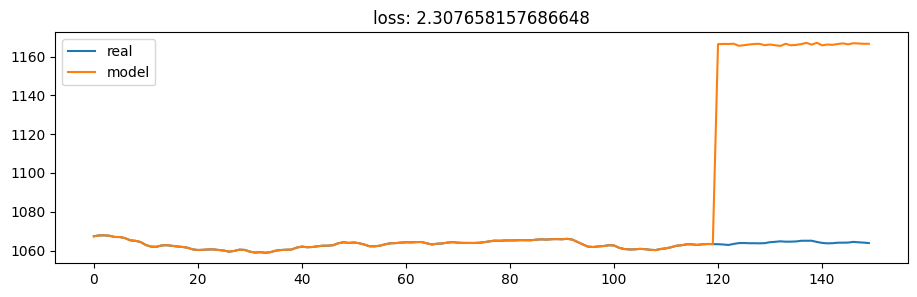

 40%|████      | 34/84 [00:05<00:07,  6.65it/s]

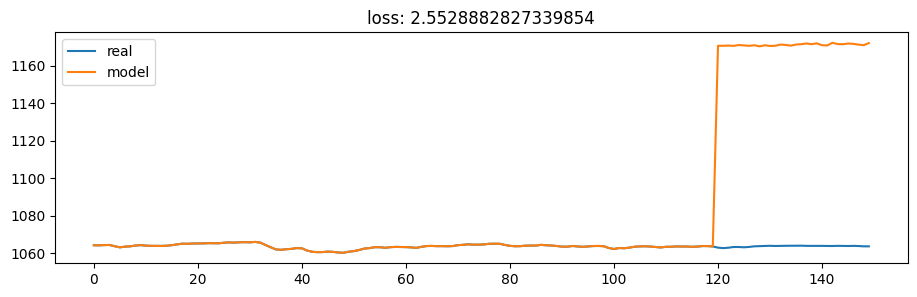

 42%|████▏     | 35/84 [00:05<00:07,  6.64it/s]

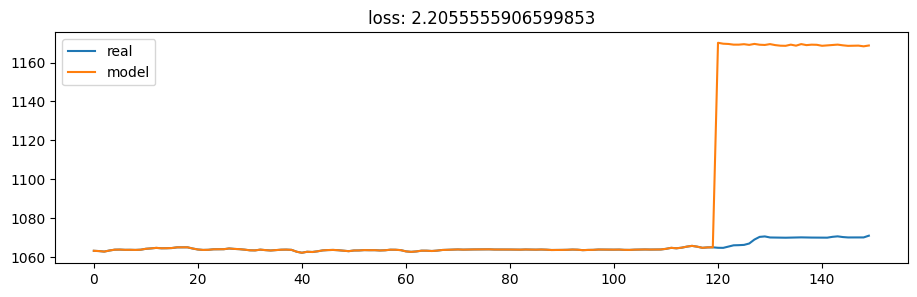

 43%|████▎     | 36/84 [00:05<00:07,  6.60it/s]

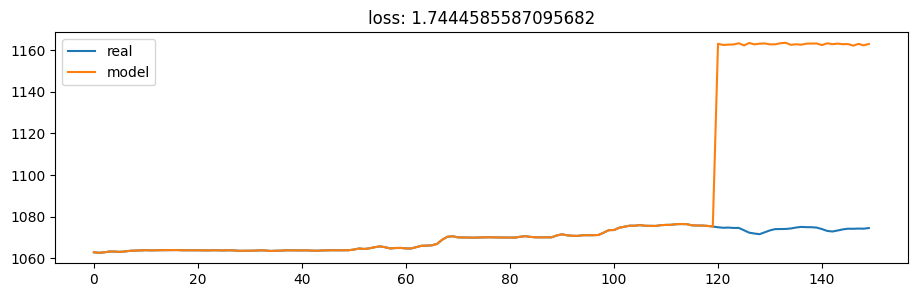

 44%|████▍     | 37/84 [00:05<00:07,  6.66it/s]

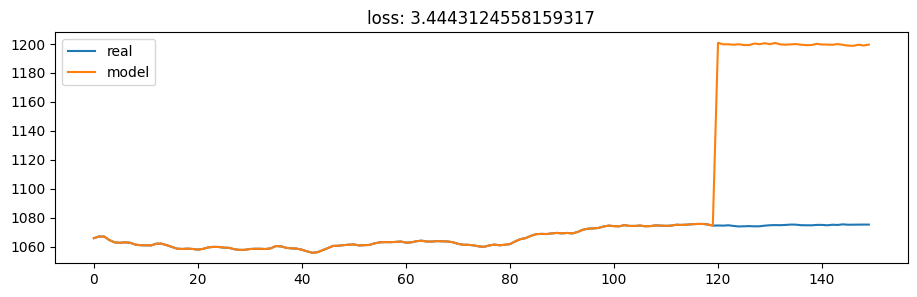

 45%|████▌     | 38/84 [00:05<00:06,  6.63it/s]

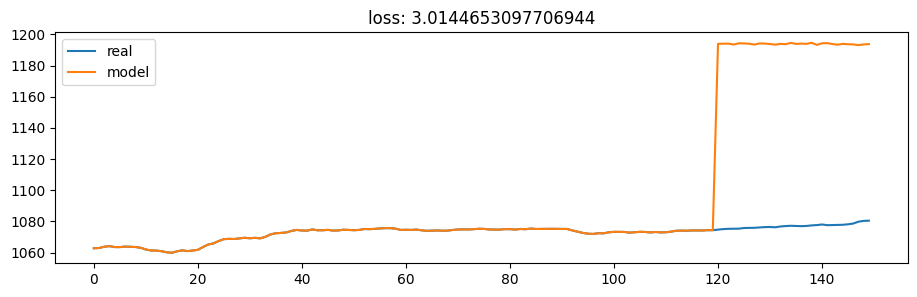

 46%|████▋     | 39/84 [00:05<00:06,  6.64it/s]

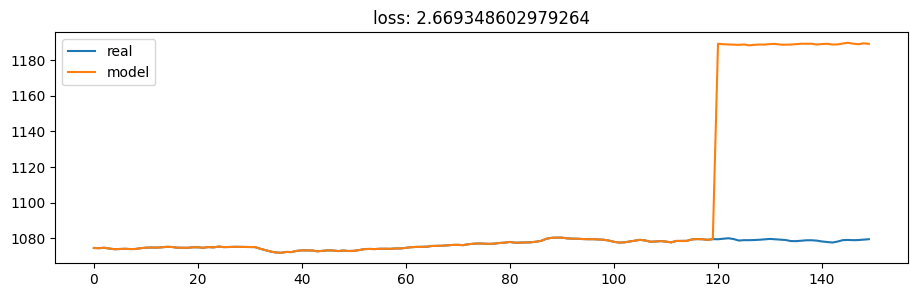

 48%|████▊     | 40/84 [00:06<00:06,  6.54it/s]

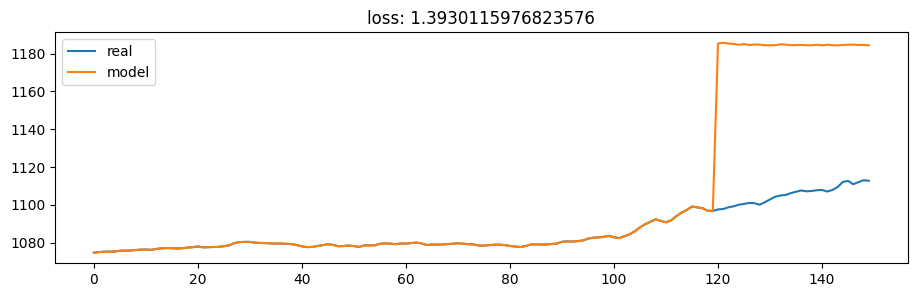

 49%|████▉     | 41/84 [00:06<00:06,  6.33it/s]

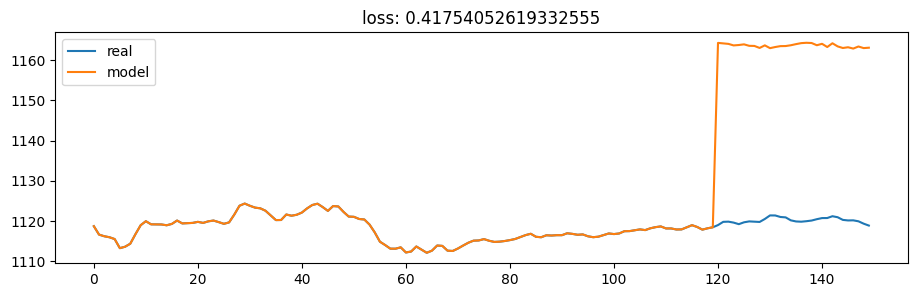

 50%|█████     | 42/84 [00:06<00:06,  6.16it/s]

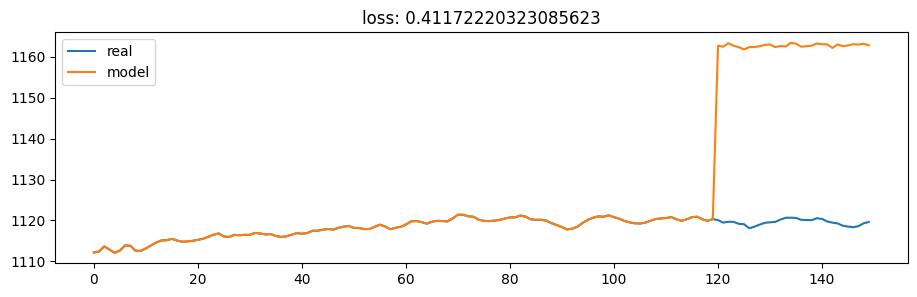

 51%|█████     | 43/84 [00:06<00:06,  6.27it/s]

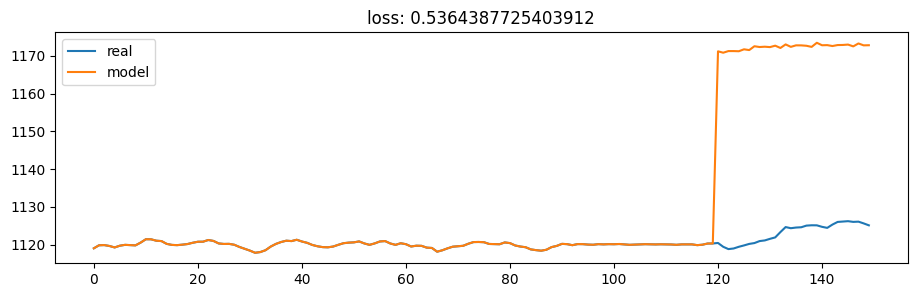

 52%|█████▏    | 44/84 [00:06<00:06,  6.46it/s]

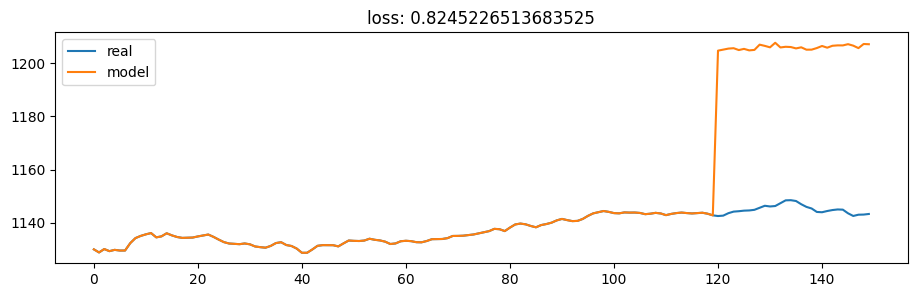

 54%|█████▎    | 45/84 [00:06<00:06,  6.05it/s]

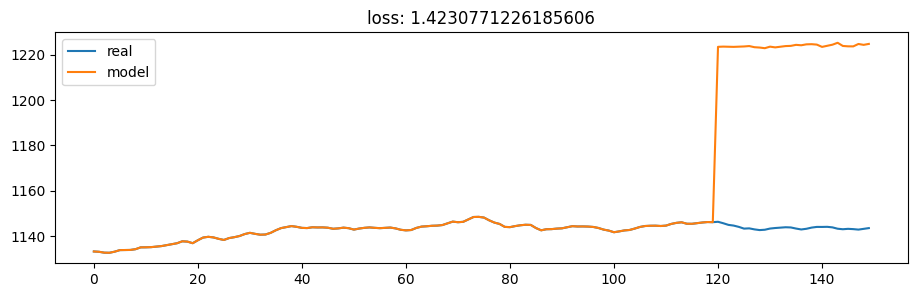

 55%|█████▍    | 46/84 [00:07<00:06,  5.79it/s]

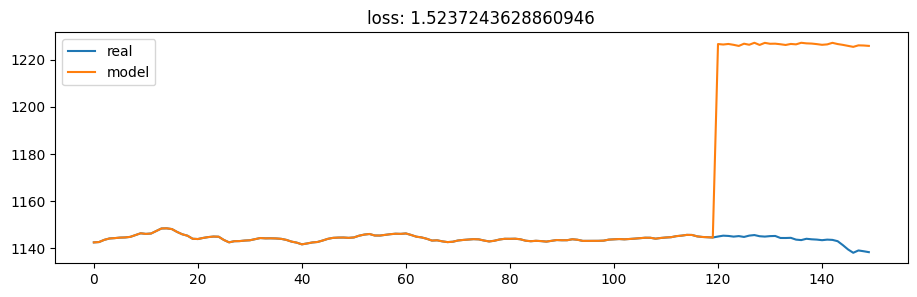

 56%|█████▌    | 47/84 [00:07<00:06,  6.10it/s]

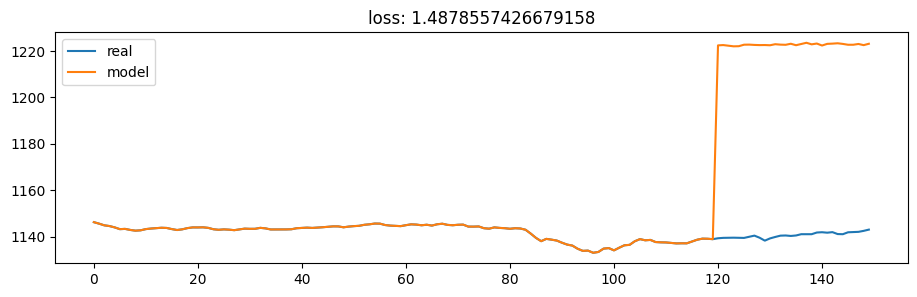

 57%|█████▋    | 48/84 [00:07<00:05,  6.33it/s]

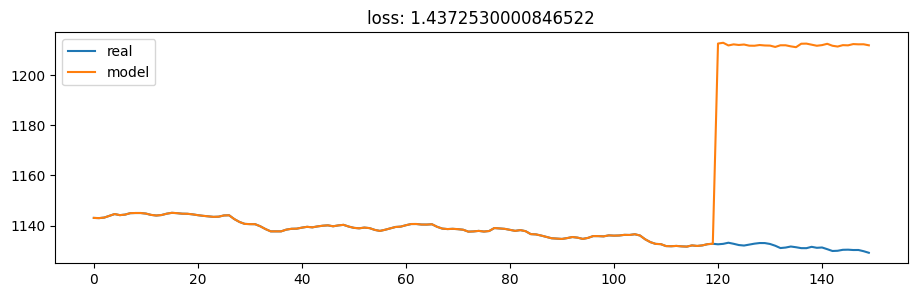

 58%|█████▊    | 49/84 [00:07<00:05,  6.49it/s]


IndexError: list index out of range

In [146]:
vis = Visualize(args, mode='val', setting=setting, weights=sorted_weights[-1], title_meta=1, decision_log=0)
loss_list, preds, trues = [], [], []
for ts in tqdm(range(0, 5000, 60)):
    pred, true, loss = vis.plot(ts, plot=1, plt_len=None)
    preds.append(pred)
    trues.append(true)
    loss_list.append(loss)

## Visualize pertervations

Load model from /Users/shiva/Desktop/data_maestro//checkpoints/mod_nlinear_attention_sl600_pl60_ds_03_23_tg_1_test/checkpoint_0.0088.pth
train 9316


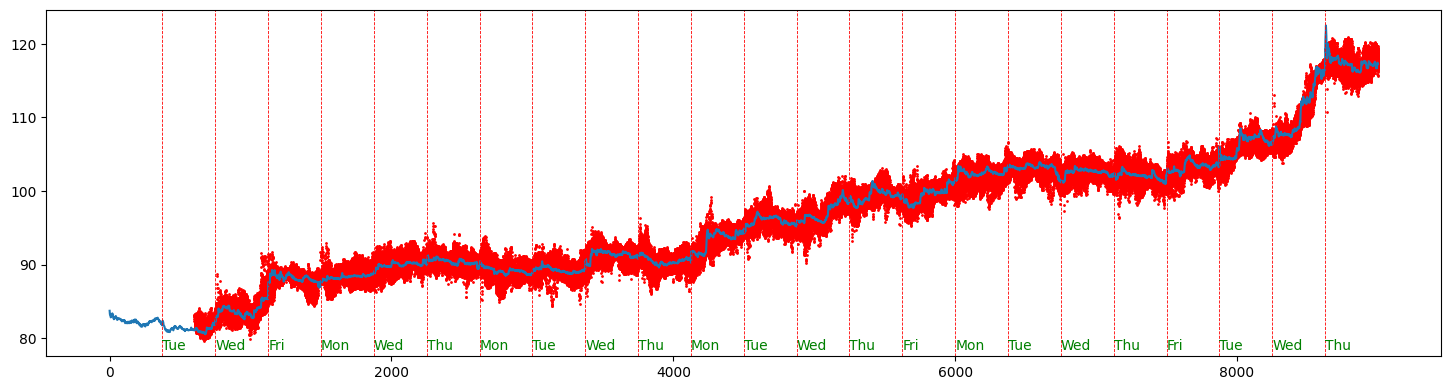

In [ ]:
scatter = Scatter(args, setting, sorted_weights[-1], mode='train')
scatter.plot(segment=[0, 9000]) ; plt.show()

In [149]:
from models.nlinear_attention import Model
class Config:
    def __init__(self):
        self.seq_len = 120
        self.pred_len = 30
        self.enc_in = 397
        self.individual = False
        self.decomp_kernal = 25
model = Model(Config())

In [218]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 0,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)
weights = os.listdir("{}/{}".format(args.checkpoints, setting))
sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)
model.load_state_dict(torch.load("{}/{}/{}".format(args.checkpoints, setting, sorted_weights[-1])))
attn_weights = model.Attention.weight.cpu().detach().numpy().copy()
sorted_weights[-1]

'checkpoint_0.0043.pth'

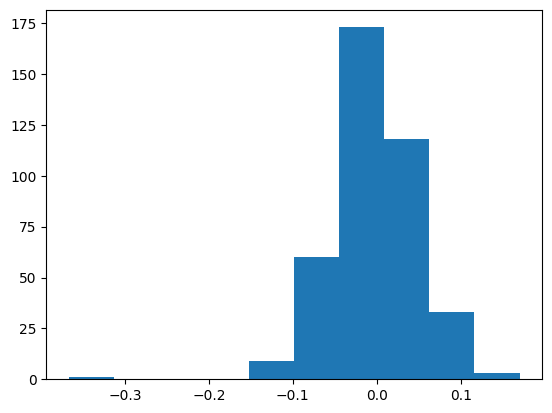

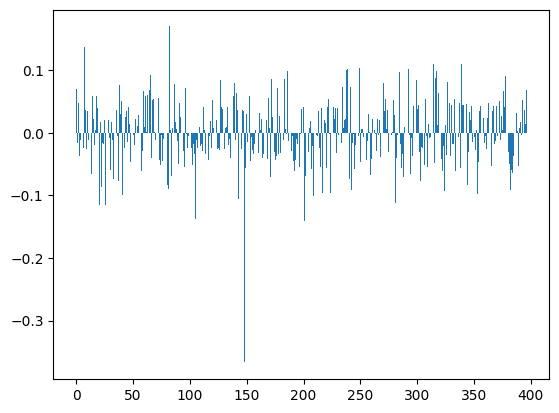

In [221]:
plt.hist(attn_weights[0]) ; plt.show()
plt.bar(np.arange(397), attn_weights[0]) ; plt.show()

In [162]:
stocks = [i for i in range(len(attn_weights[0])) if abs(attn_weights[0][i])>0.3]
sorted(stocks)

[148]

In [233]:
# sort attn_weights_test preserving index
a = np.array(abs(attn_weights_test[0])).argsort()[::-1]
a[:10]

array([138, 149, 159,  12, 357, 297, 152, 195,  98, 177])

In [234]:
# sort attn_weights_test preserving index
a = np.array(abs(attn_weights[0])).argsort()[::-1]
a[:10]

array([148,  82, 201, 105,   7, 203,  20,  26, 281, 314])

In [169]:
stocks = [i for i in range(len(attn_weights_test[0])) if abs(attn_weights_test[0][i])>0.15]
sorted(stocks)

[74, 206, 270]

In [208]:
attn_weights_test[0][:5], attn_weights[0][:5]

(array([ 0.06986644, -0.01674734,  0.04850215, -0.03687299, -0.01129768],
       dtype=float32),
 array([ 0.06986644, -0.01674734,  0.04850215, -0.03687299, -0.01129768],
       dtype=float32))

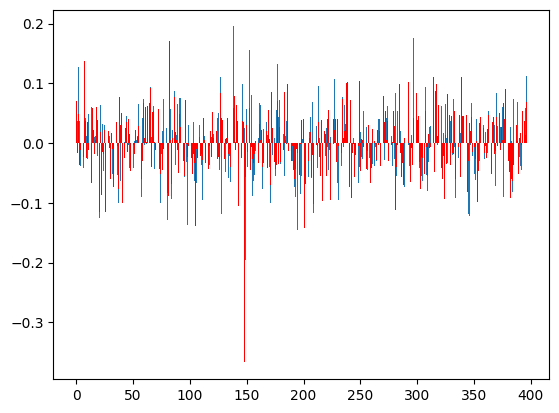

'checkpoint_0.2812.pth'

In [222]:
model.load_state_dict(torch.load("{}/{}/{}".format(args.checkpoints, setting, sorted_weights[0])))
attn_weights_test = model.Attention.weight.cpu().detach().numpy()
# plt.hist(attn_weights_test[0]) ; plt.show()
plt.bar(np.arange(397), attn_weights_test[0]) ;plt.bar(np.arange(397), attn_weights[0], color='red') ; plt.show()
sorted_weights[-3]

In [147]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 38,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)


print("\n-------------Training for target {}-------------\n".format(args.target))
exp = ExpMain(args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)
exp.train(setting)

In [269]:
stock_heatmap_matrix = get_stock_heatmap_matrix(model, 99, args)
stock_heatmap_matrix_2 = get_stock_heatmap_matrix(model, 99, args, setting_suffix='_2')

In [244]:
a = get_stock_meta("{}/instruments.json".format(ltsf), "{}/03_23.csv".format(ltsf))
names = []
for k, v in a.items():
    names.append(v['name'])

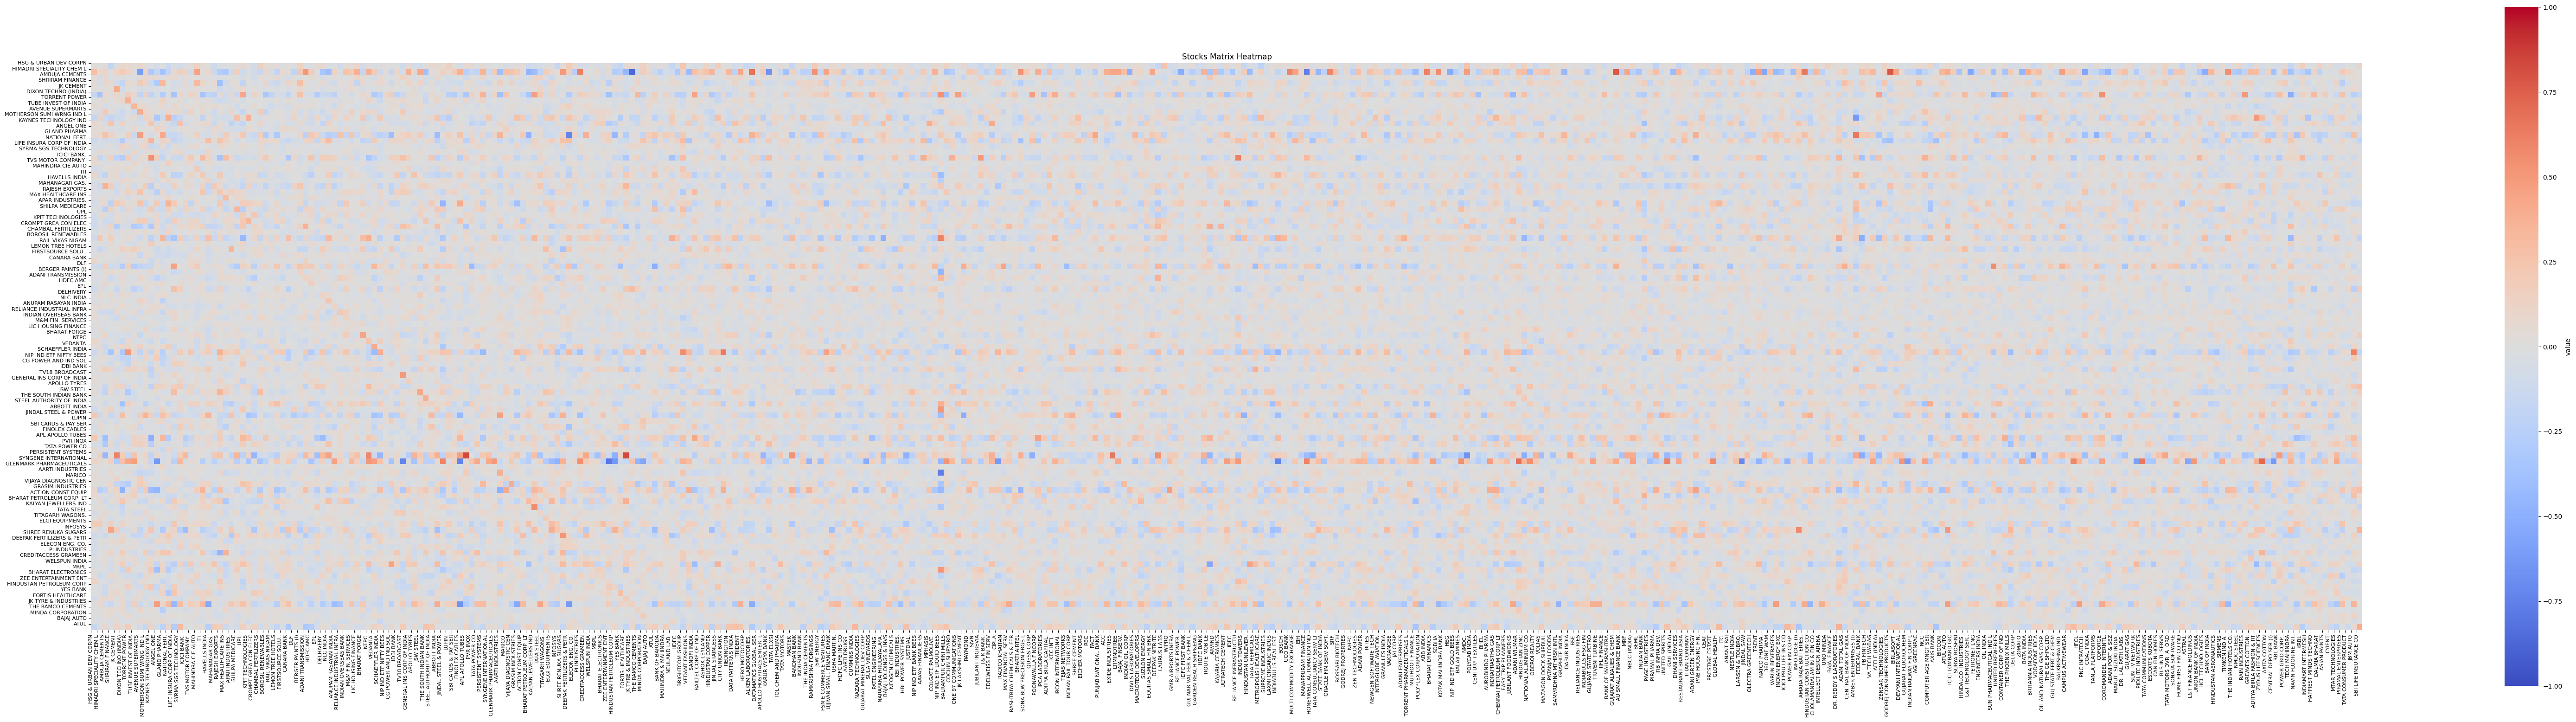

In [270]:
craete_heatmap(stock_heatmap_matrix, names)

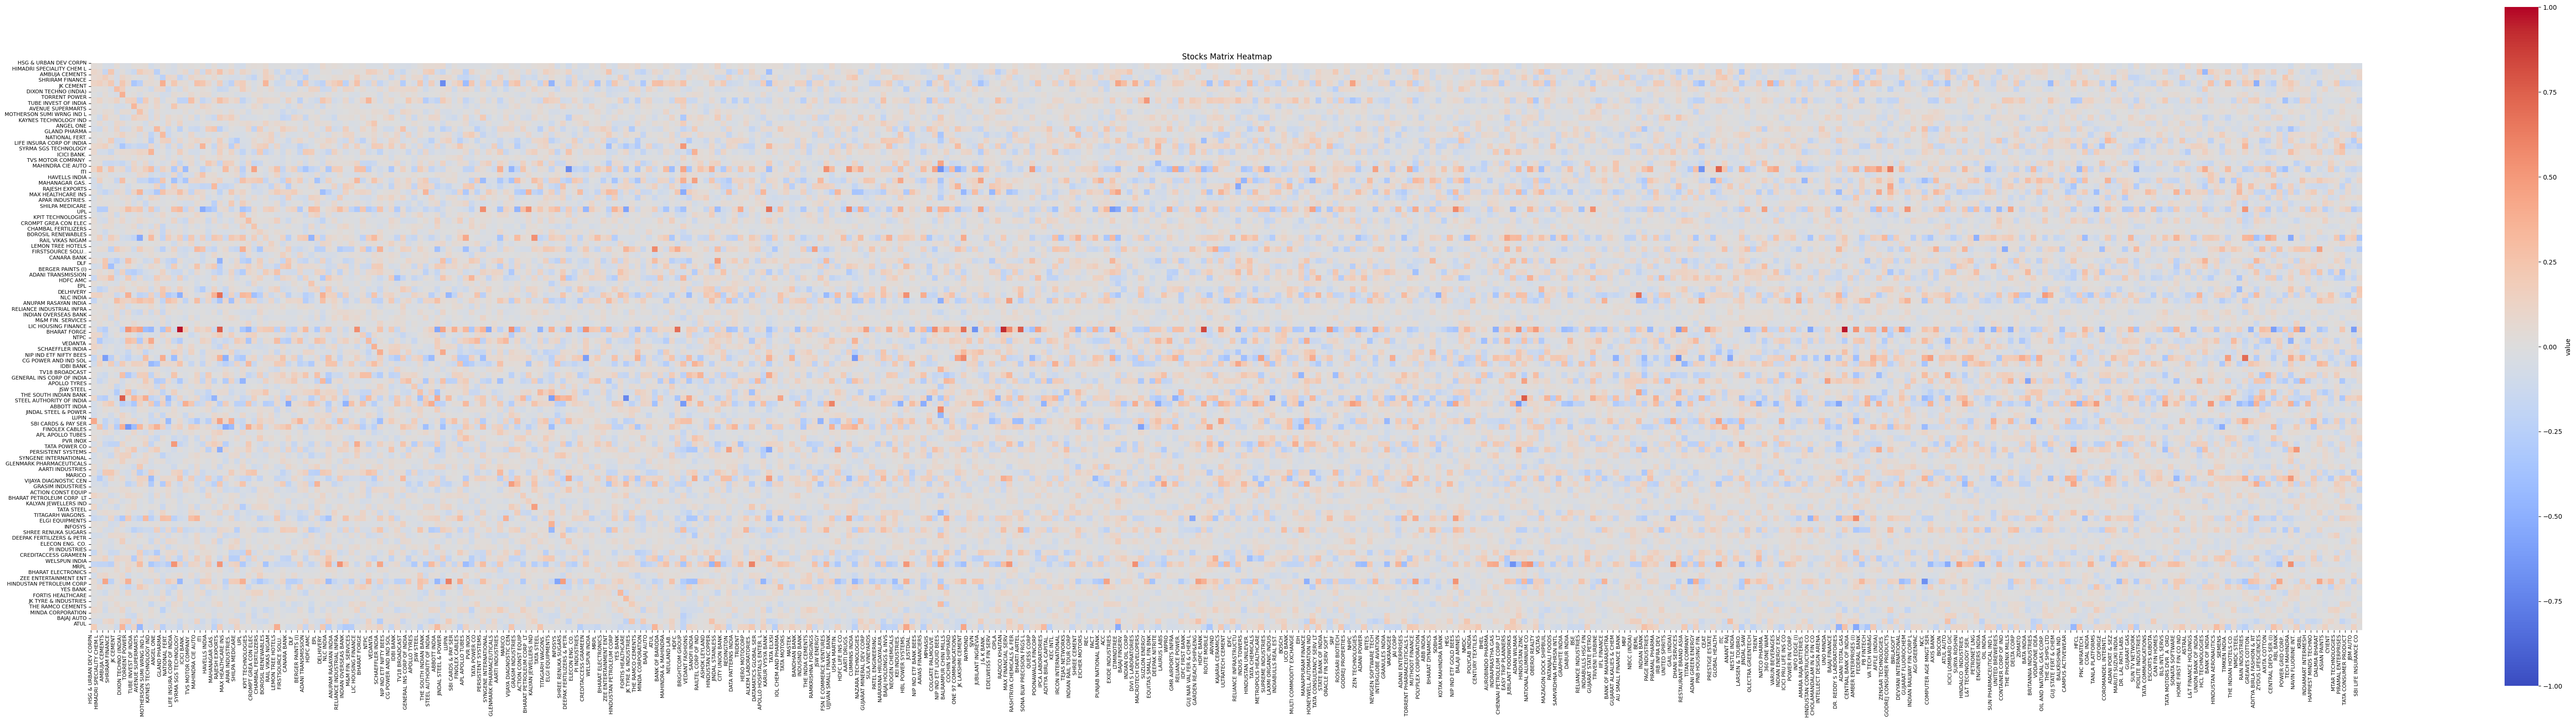

In [271]:
craete_heatmap(stock_heatmap_matrix_2, names)

In [291]:
# args sort each stock in axis0 by taking abs first
a = np.argsort(abs(stock_heatmap_matrix), axis=1)[:, ::-1]
a.shape

(99, 397)

In [293]:
# args sort each stock in axis0 by taking abs first
b = np.argsort(abs(stock_heatmap_matrix_2), axis=1)[:, ::-1]
b.shape

(99, 397)

In [341]:
k = 20
common_stock_map = {}
for i in range(99):
    common = set(a[i][:k]).intersection(set(b[i][:k]))
    common_stock_map[i] = common

In [345]:
l = []
# sort the common_stock_map by length of common stocks
sorted_map = sorted(common_stock_map.items(), key=lambda x: len(x[1]), reverse=True)
for i in sorted_map:
    l.append(len(i[1]))
    print(i[0], names[i[0]], len(i[1]))

38 HDFC AMC 8
4 JK CEMENT 6
6 TORRENT POWER 6
43 RELIANCE INDUSTRIAL INFRA 5
47 BHARAT FORGE 5
92 YES BANK 5
95 THE RAMCO CEMENTS 5
0 HSG & URBAN DEV CORPN 4
33 FIRSTSOURCE SOLU.. 4
44 INDIAN OVERSEAS BANK 4
53 IDBI BANK 4
64 FINOLEX CABLES 4
73 VIJAYA DIAGNOSTIC CEN 4
76 BHARAT PETROLEUM CORP  LT 4
77 KALYAN JEWELLERS IND 4
82 SHREE RENUKA SUGARS 4
93 FORTIS HEALTHCARE 4
11 ANGEL ONE 3
17 TVS MOTOR COMPANY  3
18 MAHINDRA CIE AUTO 3
21 MAHANAGAR GAS. 3
22 RAJESH EXPORTS 3
23 MAX HEALTHCARE INS 3
27 KPIT TECHNOLOGIES 3
28 CROMPT GREA CON ELEC 3
48 NTPC 3
51 NIP IND ETF NIFTY BEES 3
58 THE SOUTH INDIAN BANK 3
60 ABBOTT INDIA 3
67 TATA POWER CO 3
72 MARICO 3
80 ELGI EQUIPMENTS 3
87 WELSPUN INDIA 3
89 BHARAT ELECTRONICS 3
90 ZEE ENTERTAINMENT ENT 3
98 ATUL 3
5 DIXON TECHNO (INDIA) 2
7 TUBE INVEST OF INDIA 2
8 AVENUE SUPERMARTS 2
9 MOTHERSON SUMI WRNG IND L 2
10 KAYNES TECHNOLOGY IND 2
13 NATIONAL FERT. 2
14 LIFE INSURA CORP OF INDIA 2
24 APAR INDUSTRIES. 2
26 UPL 2
30 BOROSIL RENEWABLES 2
